## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets

In [47]:
# Format values return by Panda to facilitate visualizations
pd.options.display.float_format = '{:.2f}'.format

In [49]:
diabetes_dataframe = datasets.load_diabetes(as_frame=True)
X = diabetes_dataframe.data
y = diabetes_dataframe.target

# print("X - input")
# print(X.describe())

# print("y - target")
# print(y.describe())

full_data = X
full_data['target'] = y

print("Header:", full_data.head(0))

print("Full data")
print(full_data.describe())
print("More info")
print(full_data.info())

Header: Empty DataFrame
Columns: [age, sex, bmi, bp, s1, s2, s3, s4, s5, s6, target]
Index: []
Full data
         age    sex    bmi     bp     s1     s2     s3     s4     s5     s6  \
count 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00 442.00   
mean   -0.00   0.00  -0.00  -0.00  -0.00   0.00  -0.00  -0.00   0.00   0.00   
std     0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   0.05   
min    -0.11  -0.04  -0.09  -0.11  -0.13  -0.12  -0.10  -0.08  -0.13  -0.14   
25%    -0.04  -0.04  -0.03  -0.04  -0.03  -0.03  -0.04  -0.04  -0.03  -0.03   
50%     0.01  -0.04  -0.01  -0.01  -0.00  -0.00  -0.01  -0.00  -0.00  -0.00   
75%     0.04   0.05   0.03   0.04   0.03   0.03   0.03   0.03   0.03   0.03   
max     0.11   0.05   0.17   0.13   0.15   0.20   0.18   0.19   0.13   0.14   

       target  
count  442.00  
mean   152.13  
std     77.09  
min     25.00  
25%     87.00  
50%    140.50  
75%    211.50  
max    346.00  
More info
<class 'pandas.core.frame.Dat

## Graphic analysis

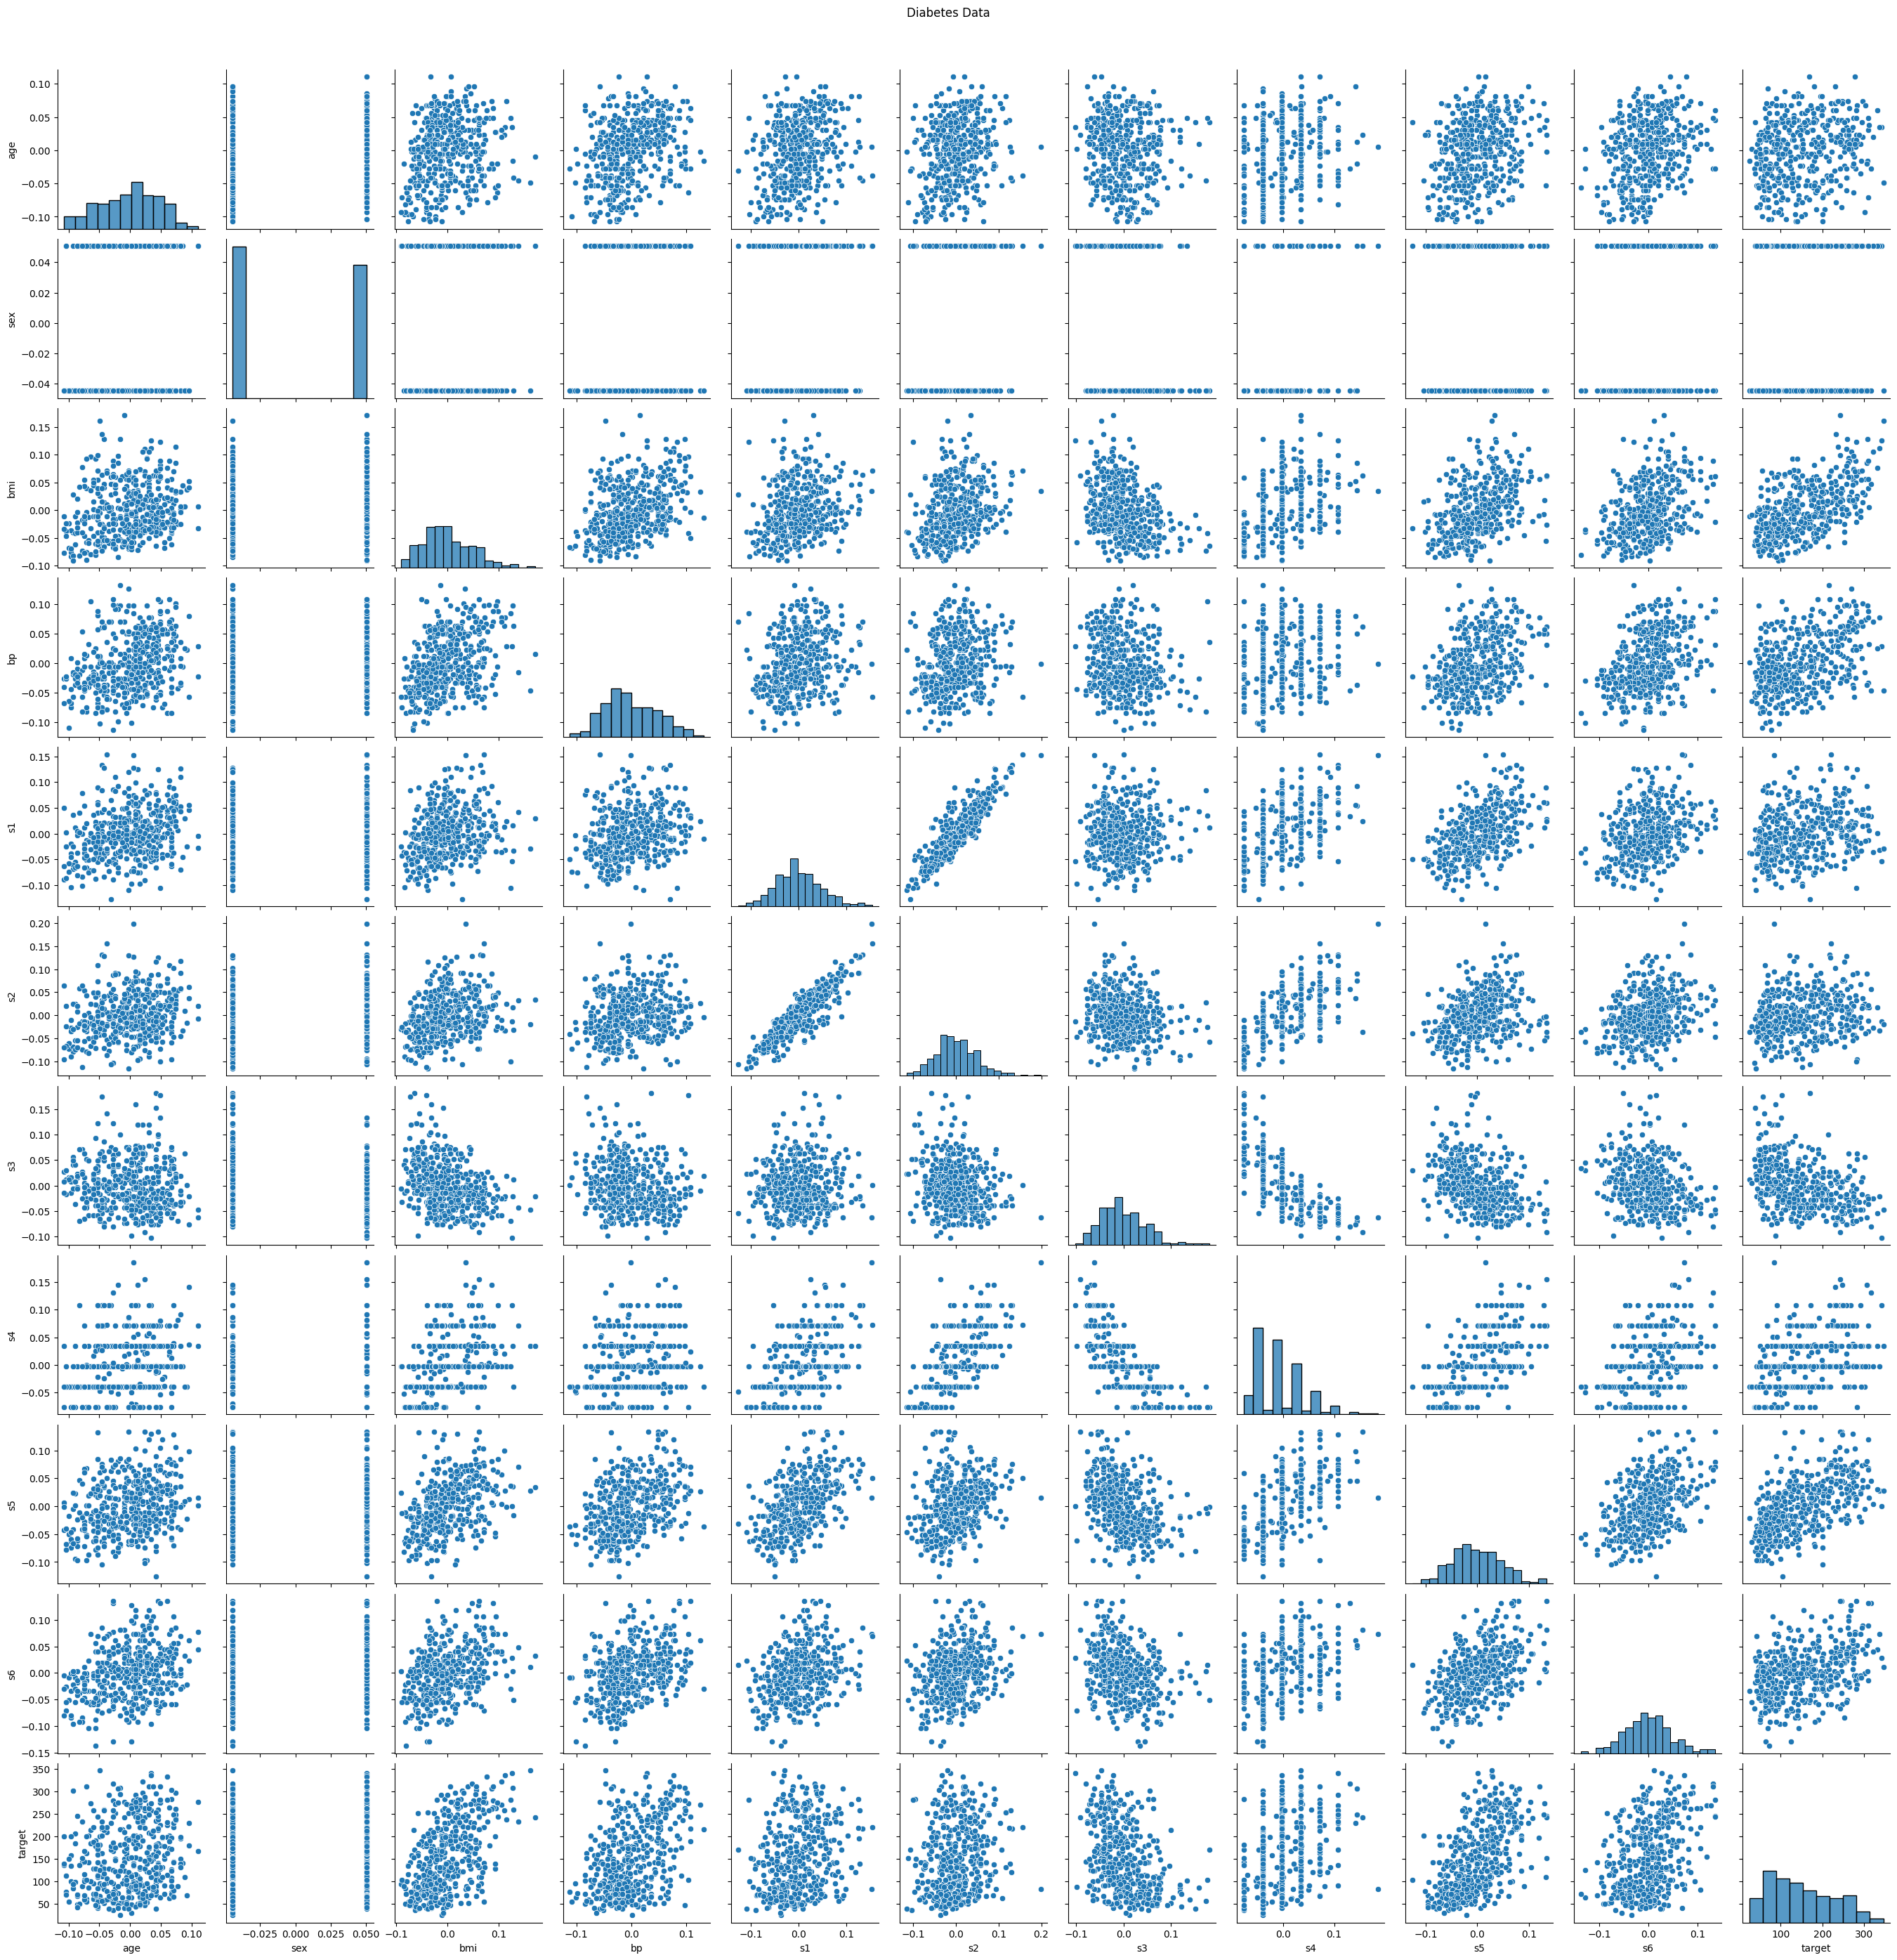

In [50]:
sns.pairplot(full_data)
plt.suptitle("Diabetes Data", y=1.02)
plt.show()

         age   sex   bmi    bp   s1    s2    s3    s4    s5    s6  target
age     1.00  0.17  0.19  0.34 0.26  0.22 -0.08  0.20  0.27  0.30    0.19
sex     0.17  1.00  0.09  0.24 0.04  0.14 -0.38  0.33  0.15  0.21    0.04
bmi     0.19  0.09  1.00  0.40 0.25  0.26 -0.37  0.41  0.45  0.39    0.59
bp      0.34  0.24  0.40  1.00 0.24  0.19 -0.18  0.26  0.39  0.39    0.44
s1      0.26  0.04  0.25  0.24 1.00  0.90  0.05  0.54  0.52  0.33    0.21
s2      0.22  0.14  0.26  0.19 0.90  1.00 -0.20  0.66  0.32  0.29    0.17
s3     -0.08 -0.38 -0.37 -0.18 0.05 -0.20  1.00 -0.74 -0.40 -0.27   -0.39
s4      0.20  0.33  0.41  0.26 0.54  0.66 -0.74  1.00  0.62  0.42    0.43
s5      0.27  0.15  0.45  0.39 0.52  0.32 -0.40  0.62  1.00  0.46    0.57
s6      0.30  0.21  0.39  0.39 0.33  0.29 -0.27  0.42  0.46  1.00    0.38
target  0.19  0.04  0.59  0.44 0.21  0.17 -0.39  0.43  0.57  0.38    1.00


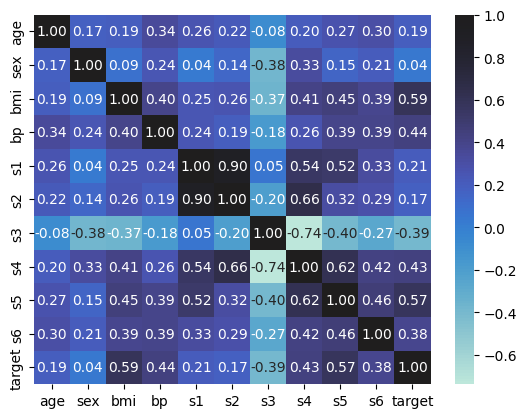

In [51]:
correlation_matrix = full_data.corr()
print(correlation_matrix)

sns.heatmap(full_data.corr(), fmt=".2f", annot=True, center=1)
plt.show()

## Creating the model

In [ ]:
# Will be used to compare different models
results = []


def build_results(model_name, model):
    return {
        'Modelo': model_name,
        'MAE': np.mean(np.abs(y - model.predict())), # Mean absolute error (the smaller, the better)
        'MSE': np.mean((y - model.predict())**2), # Mean squared error (the smaller, the better)
        'AIC': model.aic, # Akaike Information Criterion (the smaller, the better)
        'BIC': model.bic, # Bayesian Information Criterion (the smaller, the better)
        'R²': model.rsquared # Coefficient of determination (the bigger, the better)
    }

In [54]:
model_attrs="bmi" # This is the attribute with more correlation
bmi = sm.OLS.from_formula("target ~ "+model_attrs, data=full_data) # s5 is the second attribute with more correlation 
model = bmi.fit()

print(model.summary())

results.append(build_results(model_attrs, model))
# print(pd.DataFrame(results))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           3.47e-42
Time:                        07:44:36   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.0

In [55]:
model_attrs="bmi+s5"
bmi = sm.OLS.from_formula("target ~ "+model_attrs, data=full_data) # s5 is the second attribute with more correlation 
model = bmi.fit()

print(model.summary())
print("=" * 80)

results.append(build_results(model_attrs, model))

# print(pd.DataFrame(results))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     186.6
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           2.25e-59
Time:                        07:44:39   Log-Likelihood:                -2411.2
No. Observations:                 442   AIC:                             4828.
Df Residuals:                     439   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.702     56.303      0.0

In [56]:
model_attrs="bmi+s5+bp"
bmi = sm.OLS.from_formula("target ~ "+model_attrs, data=full_data) # s5 is the second attribute with more correlation 
model = bmi.fit()

print(model.summary())
print("=" * 80)

results.append(build_results(model_attrs, model))

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Mon, 28 Jul 2025   Prob (F-statistic):           7.16e-62
Time:                        07:44:42   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.653     57.342      0.0

In [57]:
print(pd.DataFrame(results))

      Modelo   MAE     MSE     AIC     BIC   R²
0        bmi 51.80 3890.46 4912.04 4920.22 0.34
1     bmi+s5 46.80 3205.19 4828.40 4840.67 0.46
2  bmi+s5+bp 45.89 3083.05 4813.23 4829.59 0.48
